# Trust Region Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def f_tr(x): # Objective function
    x1, x2 = x
    return - (x1 - 1)**2 + (x2 - 2)**4

def grad_f(x): # Gradient
    x1, x2 = x
    return np.array([-2 * (x1 - 1), 4 * (x2 - 2)**3])

def hess_f(x): # Hessian
    x1, x2 = x
    return np.array([[-2, 0], [0, 12 * (x2 - 2)**2]])

In [3]:
# Initial point
x0 = np.array([0.0, 0.0]) 
trajectory = [x0]

def callback_tr(xk, state=None):
    trajectory.append(np.copy(xk))

options = {
    "initial_tr_radius": 1.0,
    "maxiter": 3,
    "gtol": 1e-10,
    "verbose": 3
}

res_tr = minimize(
    f_tr, x0, method="trust-exact",
    jac=grad_f, hess=hess_f,
    callback=callback_tr,
    options=options,
)

c:\Users\NEEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minimize.py:738: OptimizeWarning: Unknown solver options: initial_tr_radius, verbose
  res = _minimize_trustregion_exact(fun, x0, args, jac, hess,


In [4]:
print("\nTrust Region\n")
for i, pt in enumerate(trajectory):
    print(f"Iter {i}: x = {pt}, f(x) = {f_tr(pt)}")

print("\nFinal Point:", res_tr.x)
print("\nFunction value:", res_tr.fun)
print("\nIterations performed:", res_tr.nit)


Trust Region

Iter 0: x = [0. 0.], f(x) = 15.0
Iter 1: x = [-0.86094892  0.50869142], f(x) = 1.4830507891612572
Iter 2: x = [-2.81861804  0.91799765], f(x) = -13.211237171161155
Iter 3: x = [-6.81342342  1.20011201], f(x) = -60.640214819671236

Final Point: [-6.81342342  1.20011201]

Function value: -60.640214819671236

Iterations performed: 3


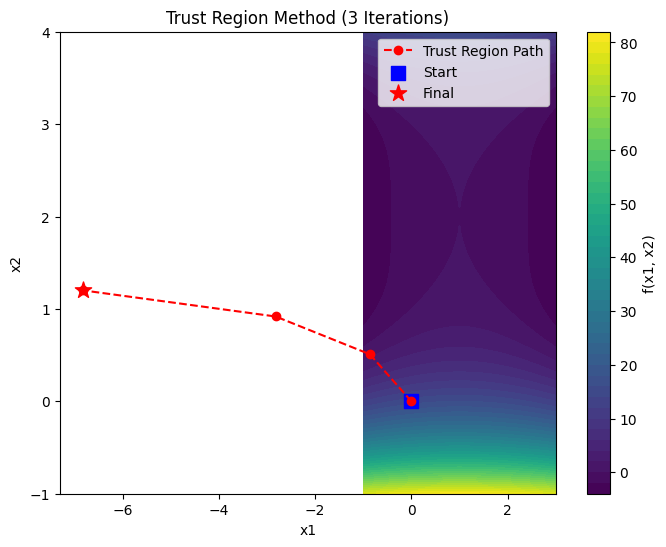

In [5]:
# Plot trajectory
x1 = np.linspace(-1, 3, 200)
x2 = np.linspace(-1, 4, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = f_tr([X1, X2])

plt.figure(figsize=(8, 6))
cs = plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(cs, label="f(x1, x2)")

traj = np.array(trajectory)
plt.plot(traj[:,0], traj[:,1], 'ro--', label="Trust Region Path")
plt.scatter(traj[0,0], traj[0,1], c='blue', marker='s', s=100, label="Start")
plt.scatter(traj[-1,0], traj[-1,1], c='red', marker='*', s=150, label="Final")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Trust Region Method (3 Iterations)")
plt.legend()
plt.show()
